Conversation 1: https://chatgpt.com/share/66fb1b9f-25f0-8010-8e73-51c92359b934

# Pre-lecture HW

#### 1

[0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "1"

The **standard deviation** is a measure of the spread of each datapoint around a dataset's mean. In comparison, the **standard error of the mean** measures the variability of the **sample means** calculated after bootstrapping. 

**Standard deviation** can help represent the variability of the dataset, while **standard error** can help us estimate statistics (e.g. μ) related to the **population**, from the **sample** that we have. 

#### 2

An x% confidence interval means for an infinite amount of samples, if a confidence interval was calculated, 95% of the intervals would have the true population mean. 

When we have a mathematical distribution with its parameters we can use a mathematical formula **(including the sample mean, critical value, and standard error)** to calculate the interval. 

When we have bootstrapped dataset with no set distribution, we can generate a set sample means by bootstrapping and then using ``np.quantile()`` to find 2.5% and 97.5% quantiles of the dataset, thus calculating the 95% confidence interval. 

#### 3.

See question above. 

#### 4. 

[0.3 points]: Correctness of understanding confirmed by code comments and relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] for Question "4"

Exploring the dataset and picking 'time_eliminated' as the dataset that I want to bootstrap: 

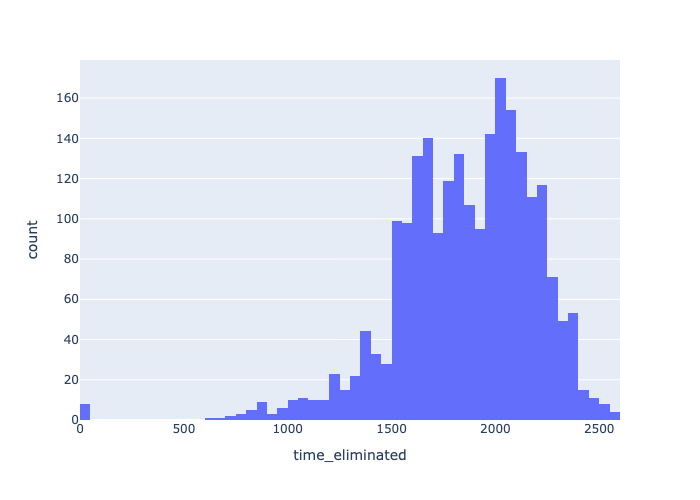

In [58]:
import pandas as pd
import numpy as np 
import plotly.express as px 
import plotly.graph_objects as go 


df = pd.read_csv('tft_data.csv')

fig = px.histogram(df, x='time_eliminated')  

# Show the plot
fig.show(renderer='png')

# print(df['time_eliminated'].count())


**Bootstrapping process (what the code does)**: 

1. Taking 1000 samples (with replacement) from the dataset using ``df.sample()`` and finding mean, median, and std dev of said samples. 
2. Plotting them for visualization.
3. Calculating and plotting their 95% confidence intervals using ``np.quantile(0.025, 0.975)``.
4. Plotted mean, median and std deviation of the dataset (even though this does not represent the population). 

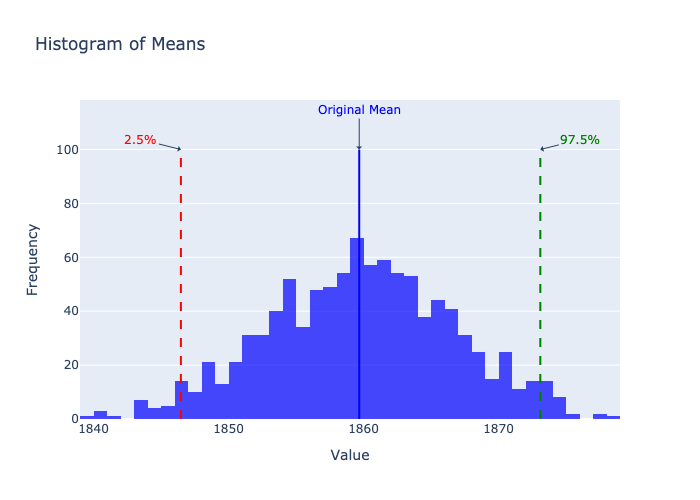

95% Confidence Interval for Means: (1846.47, 1873.10)
Dataset Mean: 1859.68


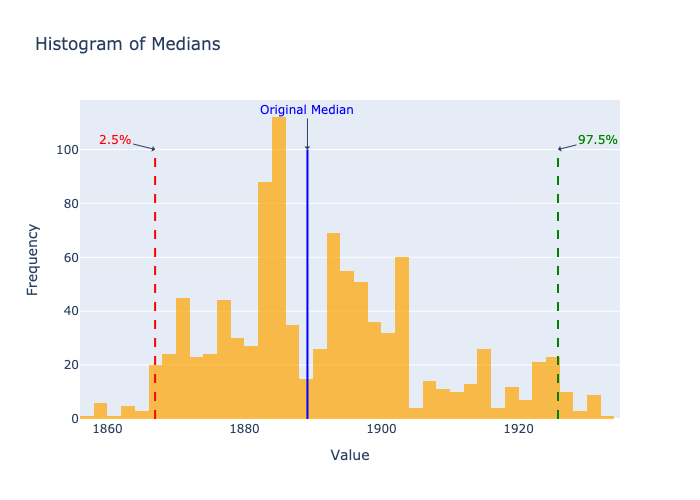

95% Confidence Interval for Medians: (1866.96, 1925.76)
Dataset Median: 1889.19


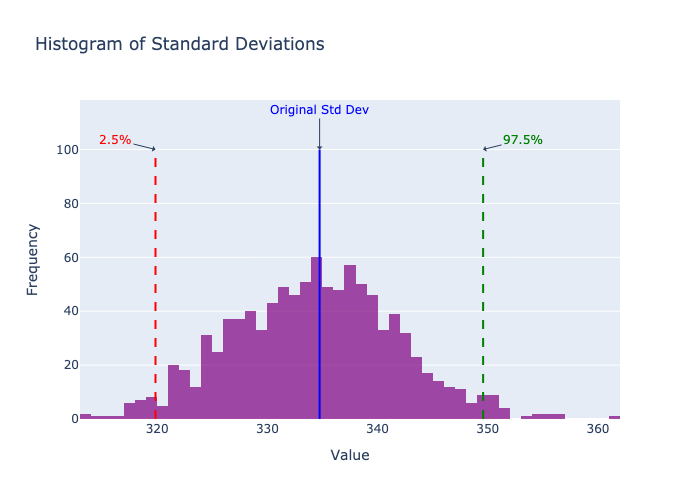

95% Confidence Interval for Standard Deviations: (319.85, 349.58)
Dataset Standard Deviation: 334.74


In [59]:
# Number of bootstrap samples
n_samples = 1000

means = []
medians = []
std_devs = []

# sampling n_samples times from the datasets (with replacement) and calculating mean, median and standard deviation
for _ in range(n_samples):
    sample = df['time_eliminated'].sample(frac=1, replace=True)  # Sampling with replacement
    means.append(sample.mean())
    medians.append(sample.median())
    std_devs.append(sample.std())

# putting all mean, median and std deviation values into an array to plot
means = np.array(means)
medians = np.array(medians)
std_devs = np.array(std_devs)

# calculate dataset mean, median and std dev 
original_mean = df['time_eliminated'].mean()
original_median = df['time_eliminated'].median()
original_std_dev = df['time_eliminated'].std()


def plot_histogram(data, title, color, original_value, label):
    fig = go.Figure()
    
    
    fig.add_trace(go.Histogram(x=data, opacity=0.7, marker_color=color))

    # calculate confidence intervals for the bootstrapping dataset
    lower_bound = np.quantile(data, 0.025)
    upper_bound = np.quantile(data, 0.975)

    fig.add_shape(type='line', x0=lower_bound, y0=0, x1=lower_bound, y1=0.1 * len(data),
                  line=dict(color='red', dash='dash'), name='95% CI Lower')
    fig.add_shape(type='line', x0=upper_bound, y0=0, x1=upper_bound, y1=0.1 * len(data),
                  line=dict(color='green', dash='dash'), name='95% CI Upper')

    fig.add_shape(type='line', x0=original_value, y0=0, x1=original_value, y1=0.1 * len(data),
                  line=dict(color='blue', dash='solid'), name=label)

    fig.add_annotation(x=lower_bound, y=0.1 * len(data), text='2.5%', showarrow=True, arrowhead=1,
                       ax=-40, ay=-10, font=dict(color='red'))
    fig.add_annotation(x=upper_bound, y=0.1 * len(data), text='97.5%', showarrow=True, arrowhead=1,
                       ax=40, ay=-10, font=dict(color='green'))
    
    fig.add_annotation(x=original_value, y=0.1 * len(data), text=label, showarrow=True, arrowhead=1,
                       ax=0, ay=-40, font=dict(color='blue'))

    fig.update_layout(title=title, xaxis_title='Value', yaxis_title='Frequency')
    fig.show(renderer='png')
    
    return (lower_bound, upper_bound)

# plot all histograms 
mean_ci = plot_histogram(means, 'Histogram of Means', 'blue', original_mean, 'Original Mean')
print(f"95% Confidence Interval for Means: ({mean_ci[0]:.2f}, {mean_ci[1]:.2f})")
print(f"Dataset Mean: {original_mean:.2f}")

median_ci = plot_histogram(medians, 'Histogram of Medians', 'orange', original_median, 'Original Median')
print(f"95% Confidence Interval for Medians: ({median_ci[0]:.2f}, {median_ci[1]:.2f})")
print(f"Dataset Median: {original_median:.2f}")

std_dev_ci = plot_histogram(std_devs, 'Histogram of Standard Deviations', 'purple', original_std_dev, 'Original Std Dev')
print(f"95% Confidence Interval for Standard Deviations: ({std_dev_ci[0]:.2f}, {std_dev_ci[1]:.2f})")
print(f"Dataset Standard Deviation: {original_std_dev:.2f}")

# Here's a summary of our conversation:

1. **Standard Deviation vs. Standard Error**: We discussed the differences between standard deviation (a measure of the variability within a dataset) and standard error (which quantifies how much the sample mean of the data is expected to vary from the true population mean).

2. **Confidence Intervals**: We covered how to calculate a 95% confidence interval mathematically and in Python using NumPy and pandas, including the use of bootstrapping and `np.quantile`.

3. **Histograms with Plotly**: You provided code to plot histograms of bootstrapped means, medians, and standard deviations using Plotly, and we discussed how to annotate confidence intervals on these histograms.

4. **Printing Confidence Intervals**: We modified the code to print confidence intervals immediately after displaying the corresponding histogram.

5. **Summary Statistics**: You requested to find the number of values in a specific DataFrame column, and we added functionality to print the original mean, median, and standard deviation of the original data column after the confidence intervals.

6. **Additional Summary Statistics**: I recommended various additional summary statistics that could be useful for data analysis, including mode, range, interquartile range, skewness, kurtosis, variance, minimum and maximum values, count, and percentiles.

If you have any other questions or need further assistance, feel free to ask!

# Post-lecture HW

#### 5. 

Because often, **we do not know the population parameters** (std dev, mean etc.) due to a limited dataset. The only way we can estimate these parameters are through bootstrapping and **finding the confidence intervals of the aggregated samples**. We can then capture the true parameter within the interval with a certain level of confidence. 

#### 6. 

[0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "6"

1. **What is the process of bootstrapping?**
   
   The process of bootstrapping involves repetitively taking random samples (with replacement) of size n (where n = size of the dataset) and calculating summary statistics with each sample. After saving all the summary statistics of all the samples, we can then plot this on a histogram and calculate confidence intervals for each statistic. 
2. **What is the main purpose of bootstrapping?**
   
   The main purpose is to estimate the parameters of the entire population given a dataset. We are always limited with the dataset in that it only is representative of a part of the population, and so if we want to learn more about the population from a small dataset, we can use bootstrapping to simulate "collecting" artificial data and using this aggregate to estimate the distribution of the population.
3. **If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

   We could use bootstrapping to create a bootstrapped sample of the population. We could then get a specific confidence interval (say, 95% with ``np.quartile(0.025, 0.975)``) and see whether the hypothesized guess was in that interval. If so, the guess is plausible. If not, the guess is implausible.  

#### 7.

When the observed sample mean statistic is not zero, this just means that on average, the drug worked for people. **This is not indicative of if anyone said that the drug didn't work, just means that more people said it worked well than didn't work or worked less well.**

However, because the confidence interval covered zero, we can be 95% confident that the true population mean is captured within this interval, meaning the population mean could be 0. **This means** that we cannot reject the null hypothesis that "the drug didn't work" because the **population mean could still be 0**, which would suggest the drug had no effect. 

**Rejecting the null hypothesis** would mean the confidence interval would have to be strictly positive or strictly negative. 

#### 8. 

#### Problem introduction 
We want to see whether AliTech's vaccine is effective or not. We have the patients' initial and final health score before and after vaccination. 

#### Method 
We can firstly calculate the change in health score to see how it has changed over course of treatment. 

**Null hypothesis**: the drug has no effect

**Alternative hypothesis**: the drug has effect

We can determine which hypothesis to reject by bootstrapping the small dataset we have and calculating the confidence interval. **If the interval includes 0**, meaning the drug could have no effect, the experiment is inconclusive. **If the interval is strictly positive or negative**, we can reject the null hypothesis and accept the alternative hypothesis. 

Firstly, import dataset as DataFrame and create a new column called DeltaHealthScore where ``df['DeltaHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']``.

In [60]:
import pandas as pd

# Creating the DataFrame with the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)
df['DeltaHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Display the DataFrame
df.head()


,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,DeltaHealthScore
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3


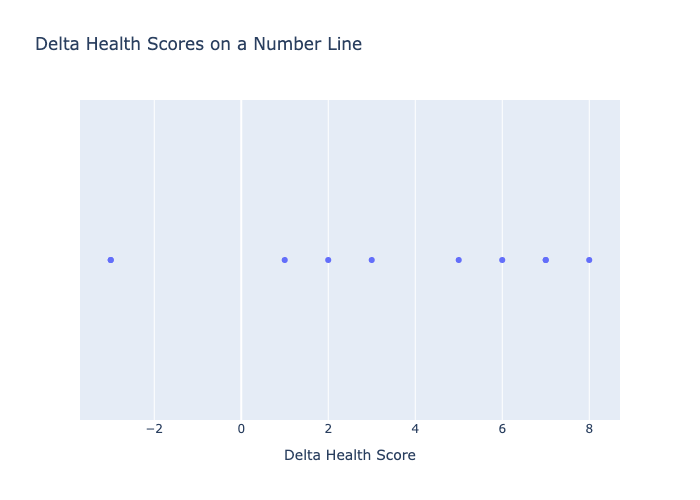

In [61]:
fig = px.scatter(
    df,
    x='DeltaHealthScore',
    y=[0] * len(df),  # Set y values to 0 for a number line
    title='Delta Health Scores on a Number Line',
    labels={'DeltaHealthScore': 'Delta Health Score'},
    hover_name='PatientID'
)

# Customize the layout
fig.update_layout(
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    xaxis_title='Delta Health Score',
    yaxis_title='',
    showlegend=False,
)

# Show the plot
fig.show(renderer='png')

As we can see, most of the patients improved over the course of their medication, but there is one patient who did not improve (meaning not strictly positive or strictly negative). Thus, we cannot conclude confidently at this point whether the drug works or not. 

Create bootstrapped sample of dataset over 1000 iterations, and plot confidence interval on the plotly histogram. 

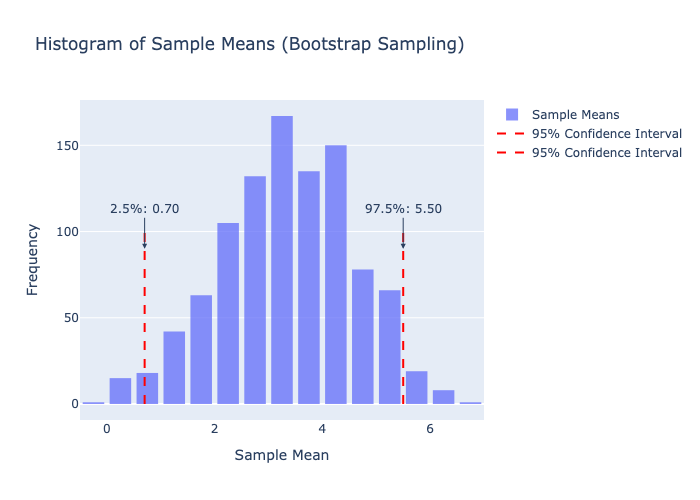

In [62]:

# Parameters for bootstrapping
n_iterations = 1000
sample_means = []

# Set random seed for reproducibility
np.random.seed(42)

# Bootstrapping to get sample means
for _ in range(n_iterations):
    sample = df['DeltaHealthScore'].sample(frac=1, replace=True)  # Sampling with replacement
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Convert sample_means to a numpy array for easy calculation
sample_means = np.array(sample_means)

# Calculate 95% confidence interval using np.percentile
lower_bound = np.percentile(sample_means, 2.5)  # 2.5th percentile
upper_bound = np.percentile(sample_means, 97.5)  # 97.5th percentile

# Create a histogram with Plotly
fig = go.Figure()

# Adding the histogram of sample means
fig.add_trace(go.Histogram(x=sample_means, nbinsx=30, name='Sample Means', opacity=0.75))

# Add lines for confidence interval
fig.add_trace(go.Scatter(
    x=[lower_bound, lower_bound],
    y=[0, 100],  # Adjust the y-axis as needed for visibility
    mode='lines',
    name='95% Confidence Interval',
    line=dict(color='red', width=2, dash='dash')
))

fig.add_trace(go.Scatter(
    x=[upper_bound, upper_bound],
    y=[0, 100],  # Adjust the y-axis as needed for visibility
    mode='lines',
    name='95% Confidence Interval',
    line=dict(color='red', width=2, dash='dash')
))

# Adjust y position for the confidence interval labels
text_y_position = 90  # Set this to a value higher than the histogram's peak for visibility

# Add text labels for the confidence interval
fig.add_annotation(
    x=lower_bound,
    y=text_y_position,  # Move upwards
    text='2.5%: {:.2f}'.format(lower_bound),
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

fig.add_annotation(
    x=upper_bound,
    y=text_y_position,  # Move upwards
    text='97.5%: {:.2f}'.format(upper_bound),
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

# Update layout
fig.update_layout(
    title='Histogram of Sample Means (Bootstrap Sampling)',
    xaxis_title='Sample Mean',
    yaxis_title='Frequency',
    bargap=0.2,
    showlegend=True
)

# Show the plot
fig.show(renderer='png')

#### Conclusion 

The final confidence interval is (0.70, 5.50). Thus, we can accept the alternative hypothesis that 'the drug has an effect' and also conclude that it is highly plausible that it had a positive effect, given that the confidence interval is strictly positive. 

#### Considerations 

1. The initial dataset is highly limited, with only 10 rows of data. This may not be enough to accurately represent the population's distribution, and thus tell us reliably whether the drug was effective or not.
2. "HealthScore" is highly subjective and depends on the patient's personal view; a big improvement for one patient may result in a DeltaHealthScore of +2, while another patient may report it as +10. 